# Take Home Quiz 1

---

This homework should be submitted **by LT** on ALICE.

## Libraries

---

Do <b>NOT</b> import any other libraries aside from those below.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [15, 5]

## Part 1. Combinations of Functions

---

For a more detailed discussion on combinations of functions, see [`Paul's Online Notes`](http://tutorial.math.lamar.edu/Classes/Alg/CombineFunctions.aspx).

Let the following:

- $f(x) = \sin(2\pi x)$


- $g(x) = \cos\left(\frac{x}{\pi}\right)$

### Preliminaries

---

#### Q. Create a numpy array (called `x`) of 1000 equally spaced numbers from -25 to 25.

In [ ]:
# np.linspace is used to generate an array of evenly spaced numbers
# Format: np.linspace(first value, last value, # of values)

x = np.linspace(-25, 25, 1000)

#### Q. Create two functions called `f(x)` and `g(x)` as defined above.

In [ ]:
# Defining the function f(x) to be sin(2*pi*x)
def f(x):
  return np.sin(2 * np.pi * x)

# Defining the function g(x) to be cos(x/pi)
def g(x):
  return np.cos(x / np.pi)

#### Q. Plot both graphs of `f(x)` and `g(x)` simulteneously (i.e. on the same plot) as a <b><u>solid blue line</u></b> and <b><u>solid red line</u></b>, respectively.

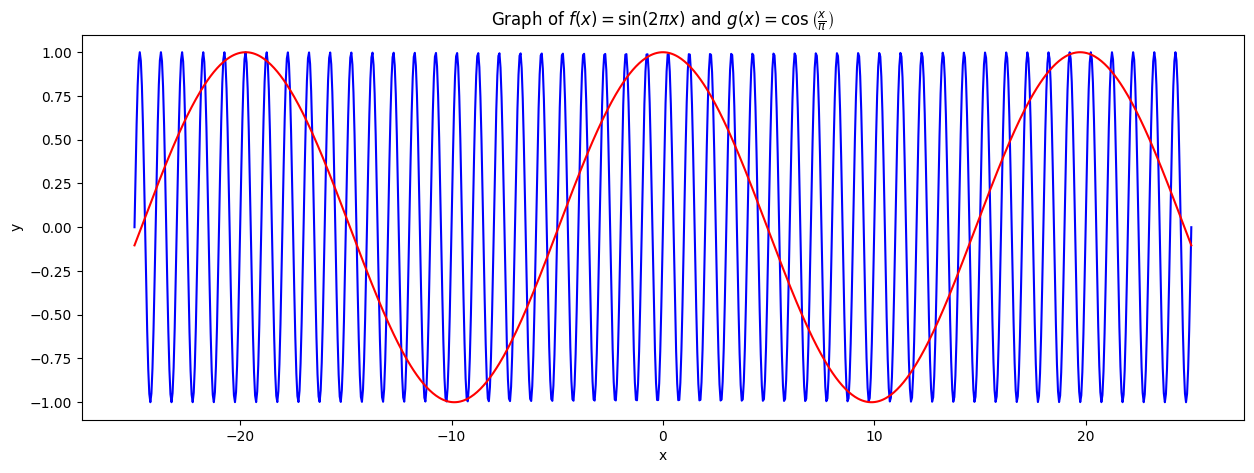

In [ ]:
# Using matplotlib to graph f(x) and g(x)

# plt.plot() -> Matplotlib function used to create line plots
plt.plot(x, f(x), color = "blue", label = r'$f(x) = \sin(2\pi x)$')
plt.plot(x, g(x), color = "red", label = r'$g(x) = \cos\left(\frac{x}{\pi}\right)$')
plt.title(r'Graph of $f(x) = \sin(2\pi x) $ and $g(x) = \cos\left(\frac{x}{\pi}\right)$')
plt.xlabel('x')
plt.ylabel('y')
# plt.show() -> |Displays the plot on the screen
plt.show()

#### Q. Based on the resulting plot above, describe the differences between the two functions. Answer in 1 to 2 sentences.

From observing the graphs above, it is clearly seen that the wavelength of $g(x)$ is greater than $f(x)$. This would also imply that $g(x)$ has a lesser frequency compared to $f(x)$, and thus $g(x)$ completes a fewer amount of oscillations (*full cycles*) than the rapidly fluctuating $f(x)$.

### Sums of Functions

---

#### Q. Plot a graph of $f(x) + g(x)$ as a <b><u>solid blue line</u></b>.

Text(0, 0.5, 'y')

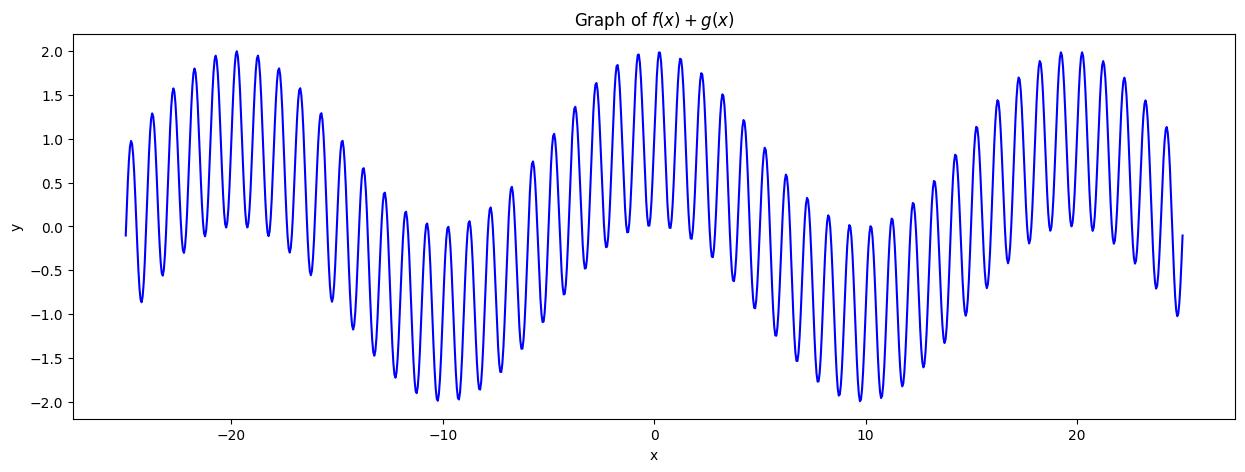

In [ ]:
plt.plot(x, f(x) + g(x), color = "blue")
plt.title(r'Graph of $f(x) + g(x)$')
plt.xlabel('x')
plt.ylabel('y')

#### Q. Describe how the two sinusoids interact when you add them. Answer in 1 to 2 sentences.

When you sum the two sinusoids, there is a noticeable change in the graph, specifcally of the varying amplitude that increases or decreases. This is because the $f(x)$ and $g(x)$ may "*cooperate*", meaning two positive values add up to make a bigger positive value or two negative values sum up to make a more negative vale, or they may "*conflict*", where $f(x)$ may be positive while $g(x)$ may be negative, thus the sum of $f(x)$ and $g(x)$ leads to a smaller value.


### Products of Functions

---

#### Q. Plot a graph of $f(x)g(x)$ as a <b><u>solid red line</u></b>. (1 pt.)

Text(0, 0.5, 'y')

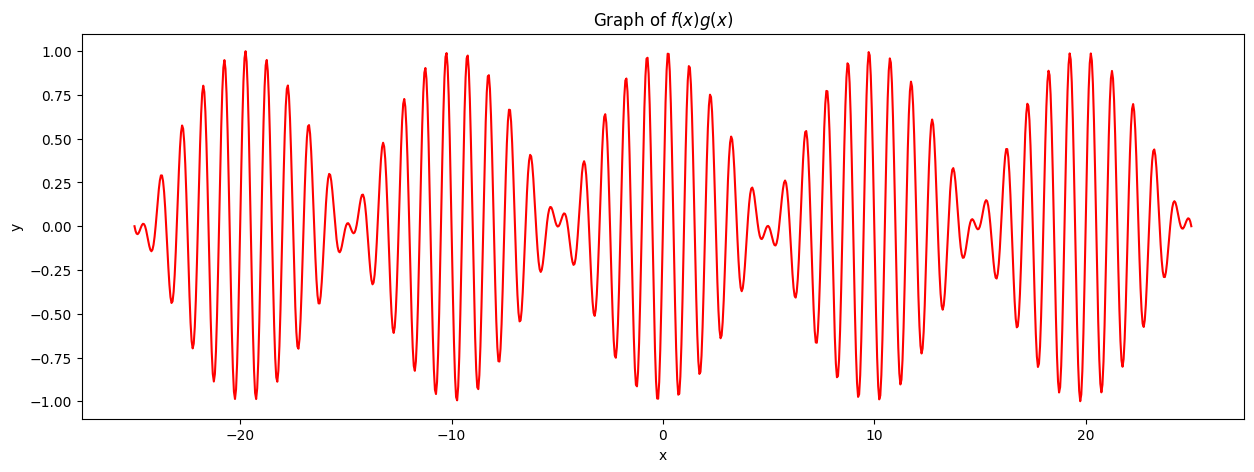

In [ ]:
plt.plot(x, f(x) * g(x), color = "red")
plt.title(r'Graph of $f(x)g(x)$')
plt.xlabel('x')
plt.ylabel('y')

#### Q. Describe how the two sinusoids interact when you multiply them. Answer in 1 to 2 sentences.

Similar to the graph of *f(x) + g(x)*, the graph of *f(x)g(x)* also has modulating amplitudes except the overall shape of the graph is now different. Some parts of the graph noticeably have compressed and expanded oscillations, meaning some amplitudes and troughs don't go as high or low compared to other portions of the graph.

### Composite Functions

---

#### Q. Plot a graph of $f(g(x))$ as a <b><u>solid green line</u></b>.

Text(0, 0.5, 'y')

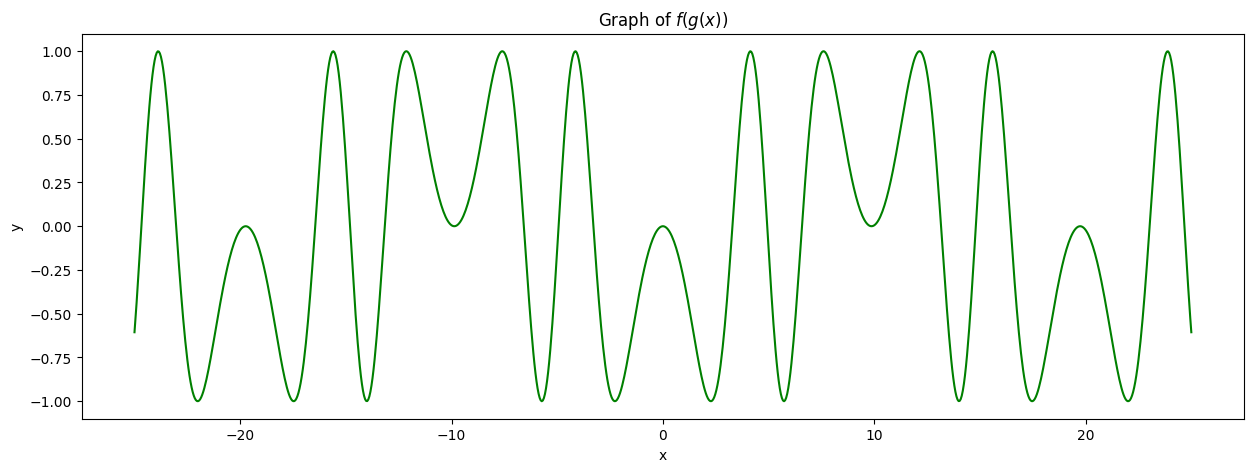

In [ ]:
plt.plot(x, f(g(x)), color = "green")
plt.title(r'Graph of $f(g(x))$')
plt.xlabel('x')
plt.ylabel('y')

#### Q. Describe how the two sinusoids interact they are composited in 1 to 2 sentences.

When the two sinusoids are composited, it could be observed that the graph does not oscillate as much as the graphs above. The pattern also has a lesser degree of uniformity as g(x) now modifies the input of f(x), leading to a distinct wave pattern.

### An Additive Model with Trend

---

#### Q. Plot all three graphs simulteneously as <b><u>dashed lines</u></b> (keep the colors specified above).

Text(0, 0.5, 'y')

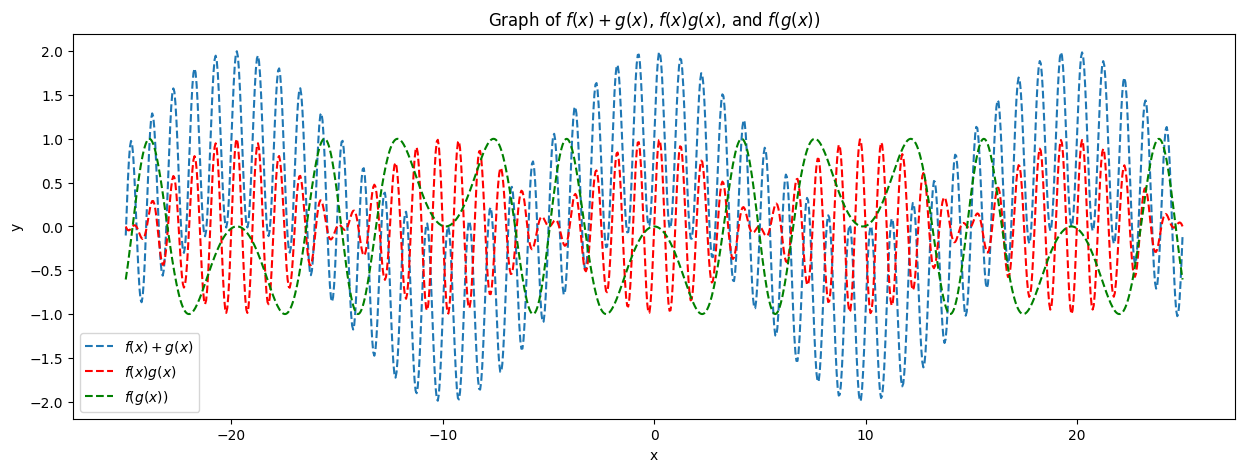

In [ ]:
plt.plot(x, f(x) + g(x), linestyle = "--", label = r'$f(x) + g(x)$')
plt.plot(x, f(x) * g(x), color = "red", linestyle = "--", label = r'$f(x)g(x)$')
plt.plot(x, f(g(x)), color = "green", linestyle = "--", label = r'$f(g(x))$')
plt.legend()
plt.title(r'Graph of $f(x) + g(x)$, $f(x)g(x)$, and $f(g(x))$')
plt.xlabel('x')
plt.ylabel('y')

#### Q. Let's try adding a positive linear trend. Plot a graph of $f(x) + g(x) + \frac{1}{8}x$ as a <b><u>solid green line</u></b>.

Text(0, 0.5, 'y')

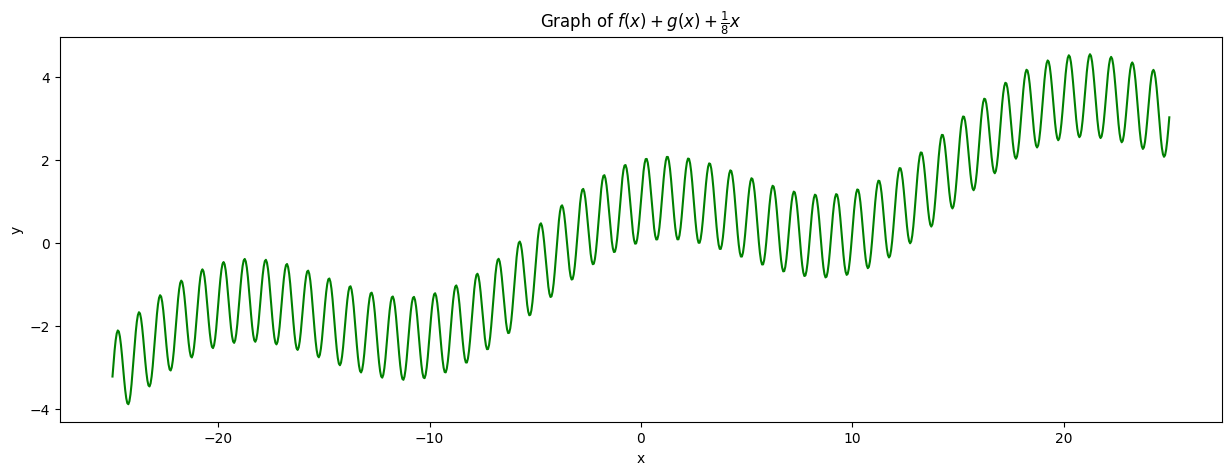

In [ ]:
plt.plot(x, f(x) + g(x) + ((1/8) * x), color = "green")
plt.title(r'Graph of $f(x) + g(x) + \frac{1}{8}x$')
plt.xlabel('x')
plt.ylabel('y')

#### Q. What kinds of data could reasonably follow the function described above? Answer in 2 to 3 sentences.

The graph shows an oscillating pattern that is on an overall upward trend while encountering constant dips in the process. A good example of data that may follow this behavior is stock prices as they may exhibit long-term growth while going through market fluctuations. Another example would be biomedical signals (*heart rate* and *EEG signals* for example), which may trend upward but may still be affected by external factors such as exercise or aging.

## Part 2. Curve Fitting

---

For this sections, we will be using the following datasets: `fit_data1.csv`, `fit_data2.csv`, `fit_data3.csv`, `fit_data4.csv`.

### `fit_data1.csv`

---

#### Q. Load the `fit_data1.csv` dataset using pandas and print the dataframe.

In [ ]:
# Insert code here
df1 = pd.read_csv('fit_data1.csv')
df1.head()

,x,y
0,0.000000,292.073549
1,0.707071,214.164335
2,1.414141,230.606929
3,2.121212,303.335048
4,2.828283,251.714122


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [ ]:
# Insert code here
x = df1['x'].to_numpy()
y = df1['y'].to_numpy()

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

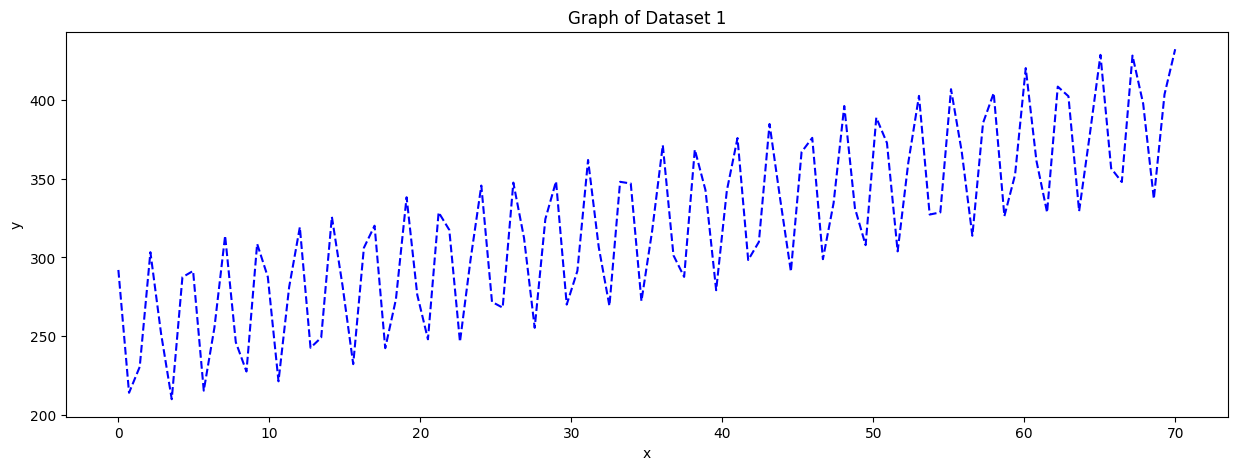

In [ ]:
# Insert code here
plt.plot(x, y, '--b')
plt.title('Graph of Dataset 1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR.

The function we used to approximate the data of ```fit_data1.csv``` is $f_1(x) = A \sin(2 \pi fx + C) + D + mx$.

In [ ]:
# Define the function 'f1'
def f1(x, amplitude, frequency, phase, bias, linear_slope):
  return amplitude * np.sin(2 * np.pi * frequency * x + phase) + bias + linear_slope * x

# Get the optimal parameters
popt, pcov = curve_fit(f1, x, y)

# Just to make the printing of parameters and SSR pretty
parameters = ['Amplitude (A)', 'Frequency (f)', 'Phase (C)', 'Bias (D)','Linear Slope (m)', 'SSR']
str_format = len(max(parameters, key = len))

# Printing the parameters
for i in range(len(popt)):
  print(f'{parameters[i].ljust(str_format)} = {popt[i]:>10.4f}')

# Printing SSR
ssr = np.sum((y - f1(x, *popt)) ** 2)
print(f'{parameters[-1].ljust(str_format)} = {ssr:>10.4f}')

Amplitude (A)    =    50.0000
Frequency (f)    =     1.0000
Phase (C)        =     1.0000
Bias (D)         =   250.0000
Linear Slope (m) =     2.0000
SSR              =     0.0000


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

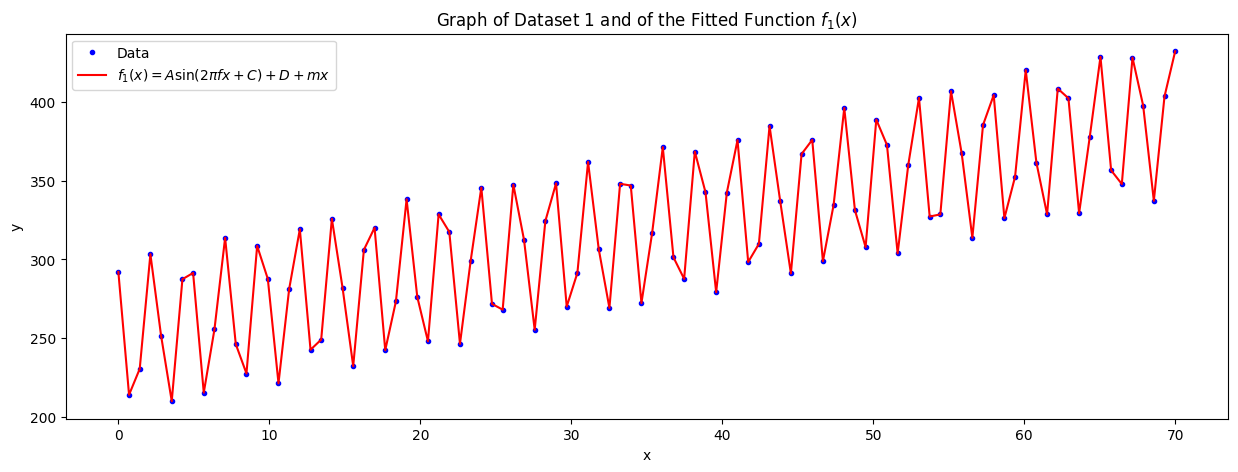

In [ ]:
# Insert code here
plt.plot(x, y, 'b.', label='Data')
plt.plot(x, f1(x, *popt), 'r', label=r'$f_1(x) = A \sin(2 \pi fx + C) + D + mx$')
plt.title(r'Graph of Dataset 1 and of the Fitted Function $f_1(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### `fit_data2.csv`

---

#### Q. Load the `fit_data2.csv` dataset using pandas and print the dataframe.

In [ ]:
#Load the dataset using pandas
data_2 = pd.read_csv('fit_data2.csv')
#Display the first few rows of the dataframe
data_2.head()

,x,y
0,0.000000,0.000000
1,0.008008,0.007944
2,0.016016,0.015762
3,0.024024,0.023454
4,0.032032,0.031022


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [ ]:
#Create the variables and convernt them into numpy arrays
x = data_2['x'].to_numpy()
y = data_2['y'].to_numpy()

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

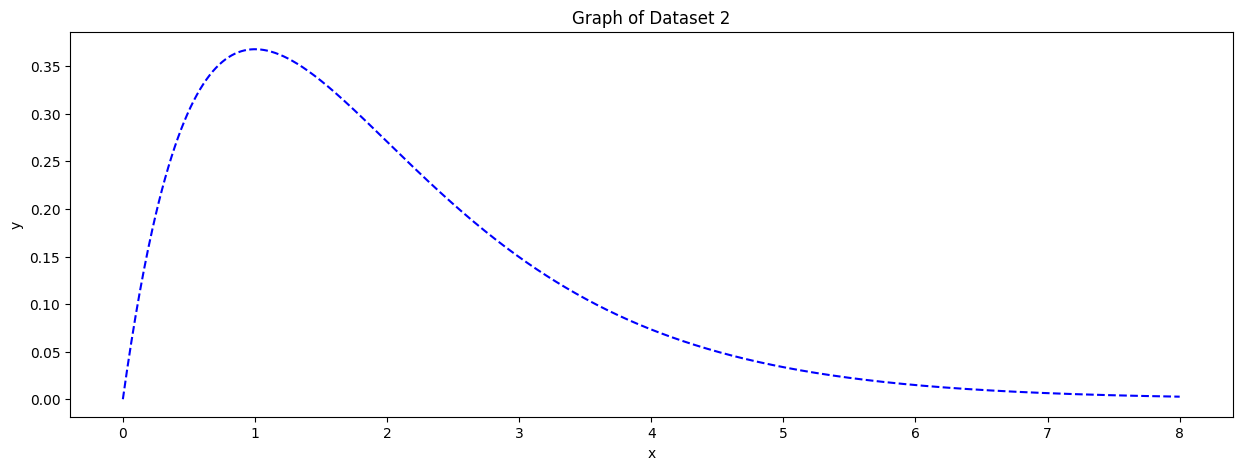

In [ ]:
#Plot the data as a dashed blue line
plt.plot(x, y, 'b--')
plt.title('Graph of Dataset 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR.

The function we used to approximate the data of ```fit_data2.csv``` was $f_2(x) = x^a e^{-bx}$.

In [ ]:
#Define the function
def f2(x, a, b):
  return x**a * np.exp(-b*x)

#Fit the function to the data
popt, pcov = curve_fit(f2, x, y)

#Calculate the SSR
ssr = sum((y-f2(x, popt[0], popt[1])) **2 )

#Print the parameters and the SSR
print('a   = ', str(popt[0]))
print('b   = ', str(popt[1]))
print('SSR = ', str(round(ssr, 6)))

a   =  1.0
b   =  1.0
SSR =  0.0


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

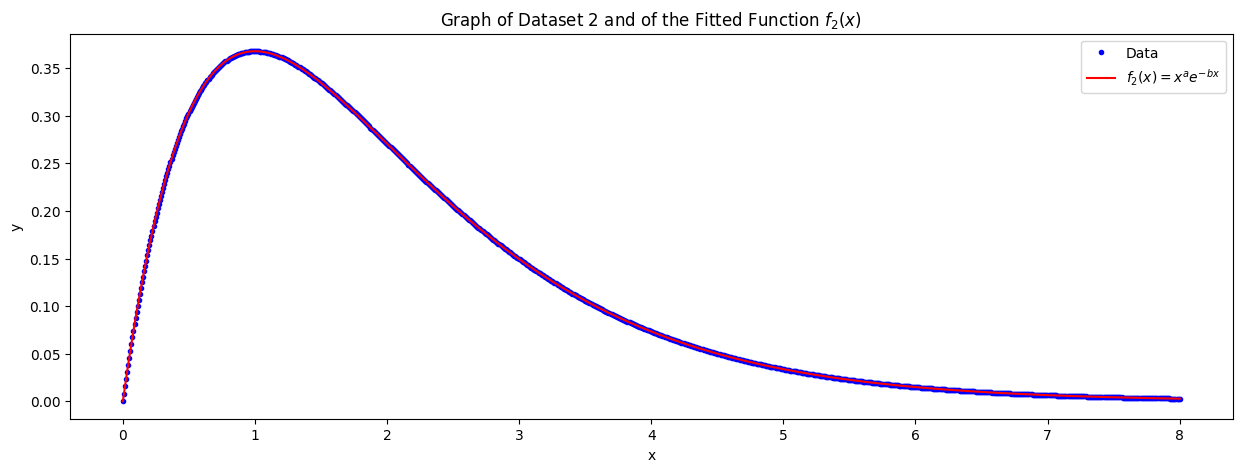

In [ ]:
#Plot the data as blue dots
#Plot the function as a smooth red line
plt.plot(x, y, 'b.', label = 'Data')
plt.plot(x, f2(x, popt[0], popt[1]), 'r', label = r'$f_2(x) = x^a e^{-bx}$')
plt.legend()
plt.title(r'Graph of Dataset 2 and of the Fitted Function $f_2(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### `fit_data3.csv`

---

#### Q. Load the `fit_data3.csv` dataset using pandas and print the dataframe.

In [ ]:
df3 = pd.read_csv('fit_data3.csv')
df3.head()

,x,y
0,-12.566371,1.000000
1,-12.312505,0.470743
2,-12.058638,0.232564
3,-11.804772,0.126156
4,-11.550906,0.078146


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [ ]:
x = df3["x"].values
y = df3["y"].values

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots)

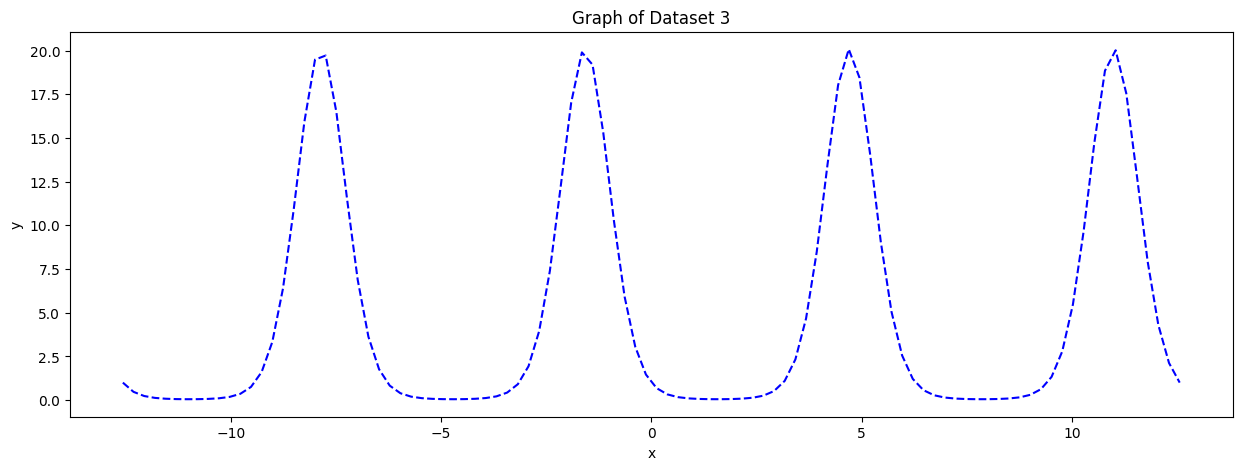

In [ ]:
plt.plot(x, y, '--b')
plt.title('Graph of Dataset 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR.

The function we used to approximate the data of ```fit_data3.csv``` was $f_3(x) = \alpha e^{A \sin(fx + C) + D}$.

In [ ]:
def f3(x, alpha, A, f, C, D):
    return alpha * np.exp(A * np.sin(f * x + C) + D)

popt, pcov = curve_fit(f3, x, y)

ssr = sum((y-f3(x, *popt)) **2 )

print('alpha   = ', str(round(popt[0], 6)))
print('A       = ', str(round(popt[1], 6)))
print('f       = ', str(round(popt[2], 6)))
print('C       = ', str(round(popt[3], 6)))
print('D       = ', str(round(popt[4], 6)))
print('SSR     = ', str(round(ssr, 6)))

alpha   =  0.975244
A       =  3.0
f       =  1.0
C       =  3.141593
D       =  0.025068
SSR     =  0.0


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

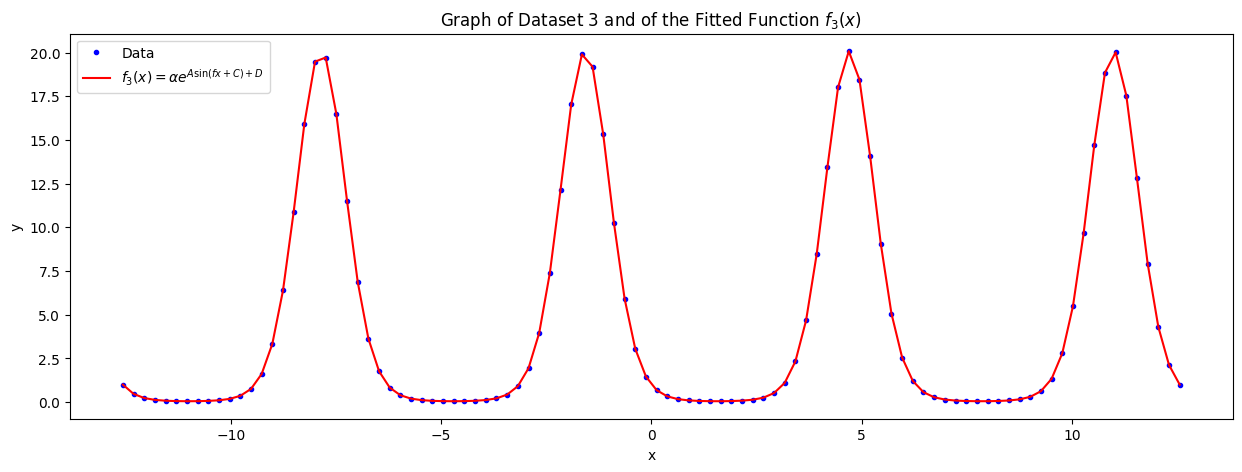

In [ ]:
plt.plot(x, y, '.b', label = 'Data')
plt.plot(x, f3(x, *popt), 'r', label = r'$f_3(x) = \alpha e^{A \sin(fx + C) + D}$')
plt.title(r'Graph of Dataset 3 and of the Fitted Function $f_3(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### `fit_data4.csv`

---

#### Q. Load the `fit_data4.csv` dataset using pandas and print the dataframe.

In [ ]:
df = pd.read_csv('fit_data4.csv')
df.head()

,x,y
0,-5.00000,0.010799
1,-4.89899,0.005704
2,-4.79798,0.006033
3,-4.69697,0.059341
4,-4.59596,0.020562


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [ ]:
x = df['x'].to_numpy()
y = df['y'].to_numpy()

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots)

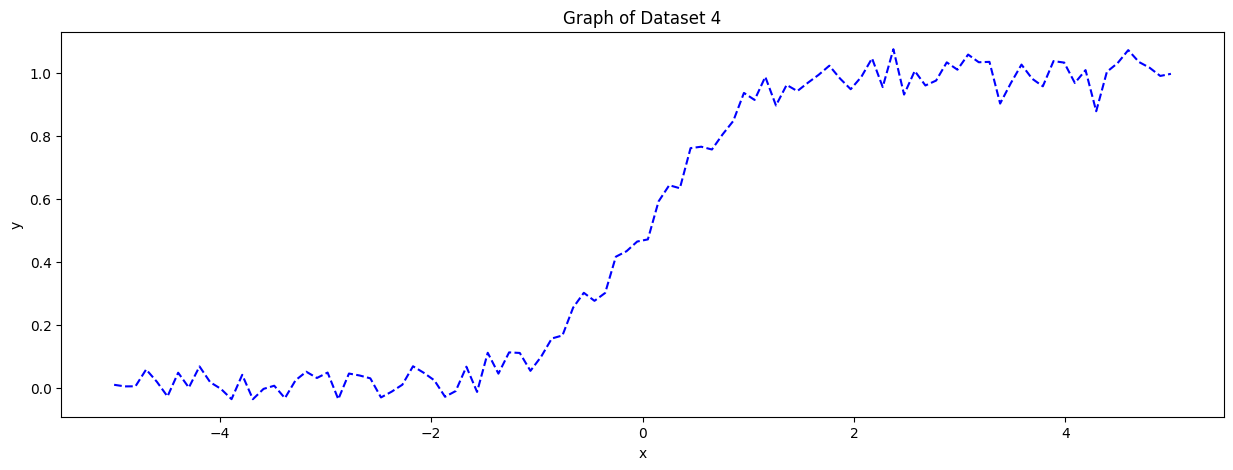

In [ ]:
plt.plot(x, y, 'b--')
plt.title('Graph of Dataset 4')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR.

In [ ]:
def f4(x, max_value, midpoint, steepness):
    numerator = np.exp(steepness * (x - midpoint))
    denominator = np.exp(steepness * (x - midpoint)) + 1

    return max_value * numerator / denominator

popt, pcov = curve_fit(f4, x, y)

parameters = ['Maximum Value (A)', 'Steepness (k)', 'Midpoint (x_o)', 'SSR']
str_format = len(max(parameters, key = len))

for i in range(len(popt)):
    print(f'{parameters[i].ljust(str_format)} = {popt[i]:>10.6f}')

ssr = sum((y - f4(x, *popt)) ** 2)

print(f'{parameters[-1].ljust(str_format)} = {ssr:>10.6f}')


Maximum Value (A) =   1.004484
Steepness (k)     =  -0.007095
Midpoint (x_o)    =   2.020935
SSR               =   0.147591


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

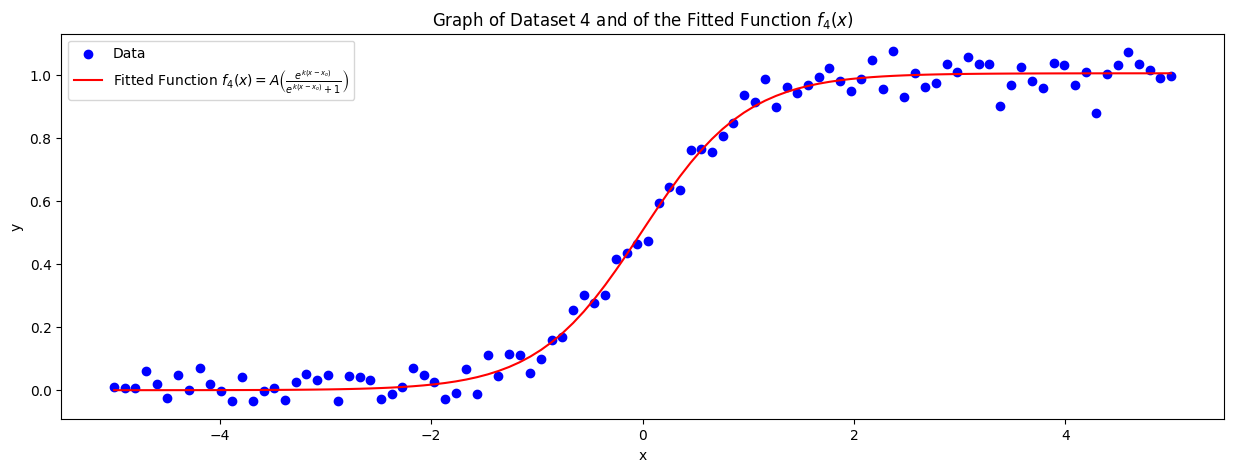

In [ ]:
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, f4(x, *popt), 'r-', label=r'Fitted Function $f_4(x) = A\left(\frac{e^{k(x-x_o)}}{e^{k(x-x_o)} + 1}\right)$')
plt.title(r'Graph of Dataset 4 and of the Fitted Function $f_4(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()